**Registration number = 2310201**

In [1]:
import pandas as pd  #import libraries
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
import os
import importlib
warnings.filterwarnings('ignore')
sns.set_theme(color_codes=True)

In [2]:
#load the dataframe and set column name
df=pd.read_csv('ratings_Electronics.csv',names=['userId', 'productId','rating','timestamp'])

#Data set link https://www.kaggle.com/datasets/irvifa/amazon-product-reviews/data

In [3]:
print("Shape of the DataFrame:", df.shape)
print("Columns of the DataFrame:", df.columns)


Shape of the DataFrame: (7824482, 4)
Columns of the DataFrame: Index(['userId', 'productId', 'rating', 'timestamp'], dtype='object')


Since our dataset is too big and it will be difficult to analyze the entire dataset due to limited resources,thats'why I am randomly taking 20% of the data as sample out of the whole dataset which is 1564896.

In [4]:
electronics_data=df.sample(n=1564896,ignore_index=True)

In [5]:
#after taking samples drop df to release the memory occupied by entire dataframe
del df

In [6]:
#print top 5 records of the dataset
electronics_data.head()

,userId,productId,rating,timestamp
0,A2XP4SB0E5KP0Q,B000LUE73U,5.0,1180051200
1,ABFP9LOT2UFSP,B003SX0O2K,5.0,1366502400
2,A2EZ74GQP6666R,B000OGX5AM,5.0,1384819200
3,A1SVC2DEI9HXNB,B005TETNIC,4.0,1390435200
4,A1LR253XJUWNBG,B0042A8CW2,5.0,1360022400


In [7]:
#print the concise information of the dataset
electronics_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1564896 entries, 0 to 1564895
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   userId     1564896 non-null  object 
 1   productId  1564896 non-null  object 
 2   rating     1564896 non-null  float64
 3   timestamp  1564896 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 47.8+ MB


In [8]:
#drop timestamp column
electronics_data.drop('timestamp',axis=1,inplace=True)

In [9]:
electronics_data.describe()

,rating
count,1.564896e+06
mean,4.012609e+00
std,1.381019e+00
min,1.000000e+00
25%,3.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


As we can see minimum rating of the products is 1 , maximum rating is 5 and average rating of the products is around 4.

In [10]:
#handle missing values
electronics_data.isnull().sum()

userId       0
productId    0
rating       0
dtype: int64

In [11]:
#handling duplicate records
electronics_data[electronics_data.duplicated()].shape[0]

0

In [12]:
electronics_data.head()

,userId,productId,rating
0,A2XP4SB0E5KP0Q,B000LUE73U,5.0
1,ABFP9LOT2UFSP,B003SX0O2K,5.0
2,A2EZ74GQP6666R,B000OGX5AM,5.0
3,A1SVC2DEI9HXNB,B005TETNIC,4.0
4,A1LR253XJUWNBG,B0042A8CW2,5.0


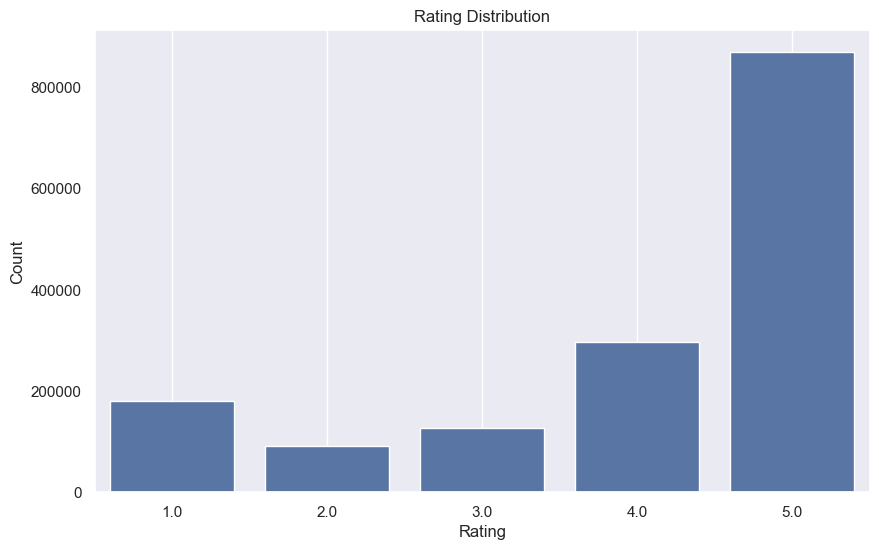

In [13]:
plt.figure(figsize=(10,6))  # PLOT RATING DIST
sns.countplot(x='rating',data=electronics_data)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.grid()
plt.show()

most of the user have given 5 rating

In [14]:
print('Total rating : ',electronics_data.shape[0])
print('Total unique users : ',electronics_data['userId'].unique().shape[0])
print('Total unique products : ',electronics_data['productId'].unique().shape[0])

Total rating :  1564896
Total unique users :  1225756
Total unique products :  237599


Analyzing the rating by user

In [15]:
# Group the DataFrame 'electronics_data' by 'userId', then count the number of ratings for each user,
# and sort the result in descending order
no_of_rated_products_per_user = electronics_data.groupby(by='userId')['rating'].count().sort_values(ascending=False)

# To show the number of ratings per user
no_of_rated_products_per_user.head()

userId
ADLVFFE4VBT8      109
A5JLAU2ARJ0BO     104
A6FIAB28IS79      102
A3OXHLG6DIBRW8     96
A1ODOGXEYECQQ8     80
Name: rating, dtype: int64

In [16]:
#THOSE USER GIVEN MORE THAN 50 RATING
print('No of rated product more than 50 per user : {} '.format(sum(no_of_rated_products_per_user >= 50)))

No of rated product more than 50 per user : 25 


**Popularity Based Recommendation**

In [17]:
#PRODUCTS THAT GOT MORE RATINGS
data=electronics_data.groupby('productId').filter(lambda x:x['rating'].count()>=50)

In [18]:
data.head()

,userId,productId,rating
2,A2EZ74GQP6666R,B000OGX5AM,5.0
4,A1LR253XJUWNBG,B0042A8CW2,5.0
7,A271FOCS9YKPSG,B003WUBIZQ,5.0
8,A1RQVS78934DNB,B005CWJB5G,5.0
12,A2F1RP9M9UME1Y,B00BZC31WQ,3.0


In [19]:
#TOP RATED PRODUCTS
no_of_rating_per_product=data.groupby('productId')['rating'].count().sort_values(ascending=False)

In [20]:
no_of_rating_per_product.head()

productId
B0074BW614    3647
B00DR0PDNE    3432
B007WTAJTO    2913
B0019EHU8G    2509
B006GWO5WK    2458
Name: rating, dtype: int64

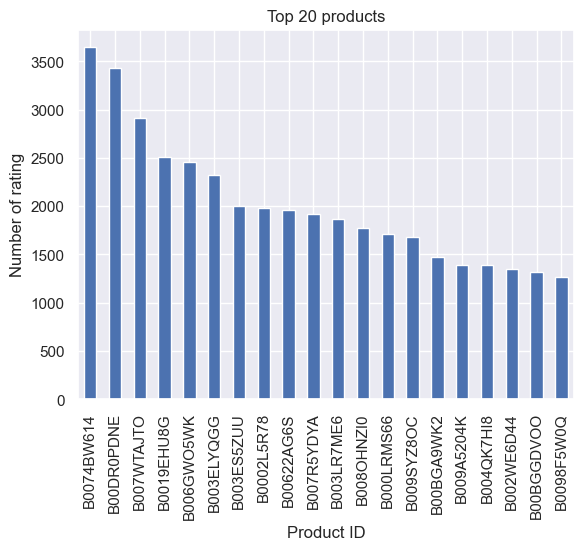

In [21]:
# Plot the top 20 products by the number of ratings they received
no_of_rating_per_product.head(20).plot(kind='bar')
plt.xlabel('Product ID')# Label the x-axis as 'Product ID'
plt.ylabel('Number of rating')# Label the y-axis as 'numb of rating'
plt.title('Top 20 products')
plt.show()

In [22]:
#average rating product
mean_rating_product_count=pd.DataFrame(data.groupby('productId')['rating'].mean())
#NEW TABLE TO FIND AVERAGE RATING PRODUCTS
mean_rating_product_count.head()

,rating
productId,
0972683275,4.490196
1400501466,3.368421
1400532655,3.840000
140053271X,3.910112
B00000DM9W,4.723684


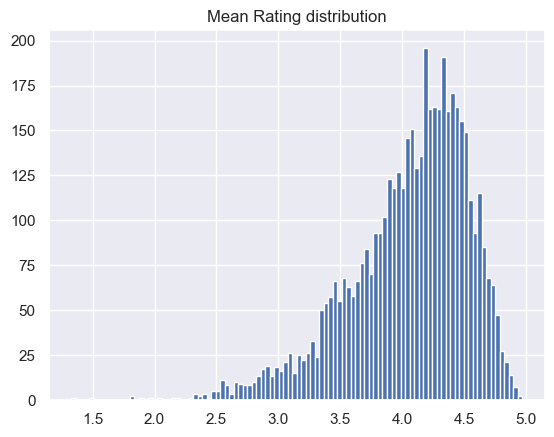

In [23]:
#plot the rating distribution of an average rating product
plt.hist(mean_rating_product_count['rating'],bins=100)
plt.title('Mean Rating distribution')
plt.show()

In [24]:
#check the skewness of the mean rating data
mean_rating_product_count['rating'].skew()

-0.9695818383032764

In [25]:
# It is highly negative skewed which means maximum products get reviewed more than the mean

In [26]:
mean_rating_product_count['rating_counts'] = pd.DataFrame(data.groupby('productId')['rating'].count())

In [27]:
# NO OF RATINGS THAN GAVE THE MEAN RATING
mean_rating_product_count.head()

,rating,rating_counts
productId,,
0972683275,4.490196,204
1400501466,3.368421,57
1400532655,3.840000,100
140053271X,3.910112,89
B00000DM9W,4.723684,76


In [28]:
#highest mean rating product
mean_rating_product_count[mean_rating_product_count['rating_counts']==mean_rating_product_count['rating_counts'].max()]  #HIGHEST RATED PRODUCT

,rating,rating_counts
productId,,
B0074BW614,4.513573,3647


min average rating products :  50
total min average rating products :  127


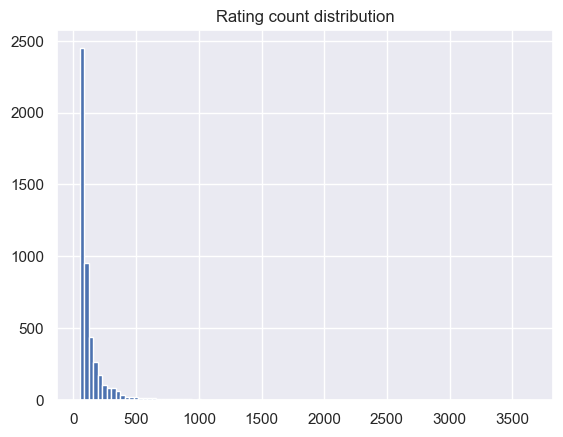

In [29]:
# Print the minimum number of ratings among all products
print('min average rating products : ',mean_rating_product_count['rating_counts'].min())
# Print the total number of products that have the minimum average rating
print('total min average rating products : ',mean_rating_product_count[mean_rating_product_count['rating_counts']==mean_rating_product_count['rating_counts'].min()].shape[0])


#plot the rating count of mean_rating_product_count
plt.hist(mean_rating_product_count['rating_counts'],bins=100)
plt.title('Rating count distribution')
plt.show()

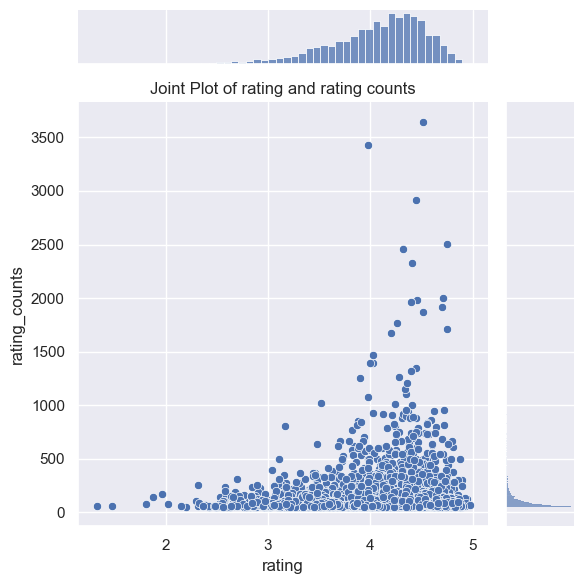

In [30]:
#joint plot of rating and rating counts
sns.jointplot(x='rating',y='rating_counts',data=mean_rating_product_count)
plt.title('Joint Plot of rating and rating counts')
plt.tight_layout()
plt.show()

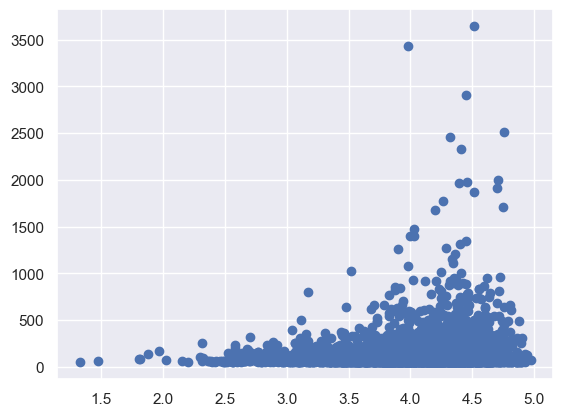

In [31]:
plt.scatter(x=mean_rating_product_count['rating'],y=mean_rating_product_count['rating_counts'])
plt.show()

In [32]:
print('Correlation between Rating and Rating Counts is : {} '.format(mean_rating_product_count['rating'].corr(mean_rating_product_count['rating_counts']))) #CORRELATION B/W RATING AND RATING COUNT

Correlation between Rating and Rating Counts is : 0.11322902373558323 


**Collaberative filtering (Item-Item recommedation)**


In [33]:
pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [34]:
pip install scikit-surprise  #BASICALLY USED FOR RECOM PURPOSE


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [35]:
pip install "numpy<2"

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [36]:
pip install --upgrade "pybind11>=2.12"


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [37]:
#import surprise library for collebrative filtering
from surprise import KNNWithMeans  #MODEL IN SUPRISE
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split

In [38]:
#Reading the dataset
reader = Reader(rating_scale=(1, 5))              #RATING B/W 1-5
surprise_data = Dataset.load_from_df(data,reader)  # NEW DF

In [39]:
#Splitting surprise the dataset into 80,20 ratio using train_test_split
trainset, testset = train_test_split(surprise_data, test_size=0.3,random_state=42)

In [40]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo = KNNWithMeans(k=5, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset)     #WE ARE USING COLL BASED FILTERING

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [41]:
## Make predictions using the test set with the algorithm (stored in 'algo')
test_pred=algo.test(testset)

#Print the Root Mean Squared Error (RMSE)
print("Item-based Model : Test Set")

# Compute and print the RMSE using the test_pred variable
accuracy.rmse(test_pred ,verbose=True)  # NO NEED FOR YTEST AND YPRED IN SUPRISE


Item-based Model : Test Set
RMSE: 1.3088


1.3088428962782621

**Model-based collaborative filtering system**



In [42]:
data2=data.sample(20000) # 20000 SAMPLES TO CREATE PIVOT TABLE
ratings_matrix = data2.pivot_table(values='rating', index='userId', columns='productId', fill_value=0)  #WHERE VALUE NOT PRESENT PUT 0
ratings_matrix.head()

productId,0972683275,1400501466,1400532655,140053271X,B00000DM9W,B00000J061,B00000J1V5,B00000JDF5,B00000K2YR,B00001P4XA,...,B00HVLUR86,B00I2VIR2M,B00I2ZBD1U,B00I94IPTW,B00IF70QCW,B00IGISO9C,B00INNP5VU,B00ISGCAJM,B00IVPU786,B00IZBNQO8
userId,,,,,,,,,,,,,,,,,,,,,
A0018140387F6UF838FIT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0102833NIZQUIFW5XF0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0110255Y4ER0RTKEKXS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A01207993SNWKZOPI8D7P,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0248467M5IK0285COTA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


above we have created a pivot table of the rating where the value of the column will rating and index will be userId and the column name will be productId

In [43]:
# Check the shape of the ratings_matrix
print("Shape of the ratings_matrix:", ratings_matrix.shape)

Shape of the ratings_matrix: (19878, 4402)


In [44]:
#transpose the matrix to make column (productId) as index and index as column (userId)
x_ratings_matrix=ratings_matrix.T

# Display the first few rows of the transposed matrix to visualize the structure
x_ratings_matrix.head()

userId,A0018140387F6UF838FIT,A0102833NIZQUIFW5XF0,A0110255Y4ER0RTKEKXS,A01207993SNWKZOPI8D7P,A0248467M5IK0285COTA,A03301153EBVJDKSCH85G,A0365775KB9EJ2IY9JCE,A04748572PAN4TI6V489A,A04760413EG48602B26VX,A047728514JDSDXMK23HS,...,AZYCAZFMDT92L,AZYFEM5VG0CUY,AZYIAWJR9972L,AZYKSZ37A2F8Q,AZYOBQYNH09NY,AZZ3QEYYE9H6C,AZZKQRD1G1KTE,AZZNHVT9AH73R,AZZP8BC9WE0N8,AZZYYC8OX8ELM
productId,,,,,,,,,,,,,,,,,,,,,
0972683275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1400501466,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1400532655,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
140053271X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00000DM9W,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
# Check the shape of the transposed ratings_matrix
print("Shape of the transposed ratings_matrix:", x_ratings_matrix.shape)


Shape of the transposed ratings_matrix: (4402, 19878)


In [46]:
#Decomposition of the matrix using Singular Value Decomposition technique
from sklearn.decomposition import TruncatedSVD  #TO REDUCE DIMENSION FOR BETTER PREDICTION

# Initializing TruncatedSVD with 10 components to perform dimensionality reduction
SVD = TruncatedSVD(n_components=10)

# resulting in a decomposed matrix with reduced dimensions
decomposed_matrix = SVD.fit_transform(x_ratings_matrix)

# Print the shape of the decomposed matrix to see the dimensions after reduction
print("Shape of the decomposed matrix:", decomposed_matrix.shape)

Shape of the decomposed matrix: (4402, 10)


In [47]:
#Correlation Matrix
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape   #TO FIND CLOSENESS B/W EACH

(4402, 4402)

In [48]:

# Access the index label at position 10 in the transposed ratings matrix (productId at index 10)
productId_at_index_10 = x_ratings_matrix.index[10]

# Print the productId at index 10
print("ProductID at index 10:", productId_at_index_10)


ProductID at index 10: B00001P4XH


In [49]:
i="B00001P4ZH"
# Get a list of product names (index) from the transposed ratings_matrix
product_names=list(x_ratings_matrix.index)
# Find the index of the specified product ID in the list of product names
product_id=product_names.index(i)
# Print the index of the specified product ID
print(product_id)


11


Correlation for all items with the item purchased by this customer based on items rated by other customers people who bought the same product

In [50]:
correlation_product_ID = correlation_matrix[product_id]
# Extract the correlation values for a specific product ID from the correlation_matrix
# and simultaneously print the shape of the resulting correlation_product_ID
correlation_product_ID.shape


(4402,)

In [51]:
correlation_matrix[correlation_product_ID>0.75].shape  #RECOM PROD HAVING HIGH CORR (530 RECORDS)

(1039, 4402)

In [52]:
#Recommending top 20 highly correlated products in sequence
recommend = list(x_ratings_matrix.index[correlation_product_ID > 0.75])
recommend[:20]

['1400501466',
 'B00000K2YR',
 'B00001P4XH',
 'B00001P4ZH',
 'B00001W0EQ',
 'B00004SABB',
 'B00004SABJ',
 'B00004SB92',
 'B00004TDLD',
 'B00004WCID',
 'B00004Z0C7',
 'B00004ZCJE',
 'B00005ARK3',
 'B00005ATMB',
 'B00005BC0J',
 'B00005LEN4',
 'B000066E6Y',
 'B000066R6M',
 'B000067RBT',
 'B000067RT6']

In [53]:
ss = pd.DataFrame(recommend)
ss.head()

,0
0,1400501466
1,B00000K2YR
2,B00001P4XH
3,B00001P4ZH
4,B00001W0EQ


In [54]:
from surprise.model_selection import GridSearchCV
from surprise import Dataset
from surprise import Reader

In [55]:
# Load your data into a Surprise dataset object
reader = Reader(line_format='user item rating', sep=',', rating_scale=(1, 5))
file_path = 'ratings_Electronics.csv'  # File path of your dataset
surprise_data = Dataset.load_from_file(file_path, reader)

In [56]:
# Define parameter grid
param_grid = {'k': [3, 5, 10, 20], 'sim_options': {'name': ['pearson_baseline'], 'user_based': [False]}}


In [61]:
# Initialize GridSearchCV with the KNNWithMeans algorithm and parameter grid
grid_search = GridSearchCV(KNNWithMeans, param_grid, measures=['RMSE'], cv=3, n_jobs=-1)

In [63]:
# Perform hyperparameter optimization on the surprise_data
#grid_search.fit(surprise_data)

In [59]:
###
# Get the best RMSE score and corresponding parameters
#print('Best RMSE score:', grid_search.best_score['rmse'])
#print('Best parameters:', grid_search.best_params['rmse'])

# Get the best estimator (model) obtained from hyperparameter tuning
#best_model = grid_search.best_estimator['rmse']

# Train the best model on the entire training set
#trainset = surprise_data.build_full_trainset()
#best_model.fit(trainset)

# Make predictions on the test set using the best model
#test_pred = best_model.test(testset)

# Evaluate the best model's performance using RMSE
#print("Optimized Model : Test Set")
#accuracy.rmse(test_pred, verbose=True)
